# Problem Statement

#### This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

##### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Business Goal: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the `'cnt'` variable indicates `the total number of bike rentals, including both casual and registered`. The `model should be built` taking this `'cnt' as the target variable`.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing necessary libraries
import numpy as np, pandas as pd

In [3]:
sharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Check the tail of the dataset
sharing.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## The given data set contains data from 01-01-2018 to 31-12-2019 i.e 2 years of data

## Inspect the various aspects of the sharing dataframe

In [6]:
sharing.shape

(730, 16)

In [7]:
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Converting date to Pandas datetime format
sharing["dteday"] = pd.to_datetime(sharing["dteday"])

In [9]:
# function for converting season in to categorical strings
def string_map(x):
    if x==1:
        return("spring")
    if x==2:
        return("summer")
    if x==3:
        return("fall")
    else:
        return("winter")

# Applying the function to the Sharing list
sharing["season"] = sharing["season"].apply(string_map)

In [10]:
# function for converting weathersit in to categorical strings
def string_map_2(x):
    if x==1:
        return("Clear")
    if x==2:
        return("Cloudy")
    if x==3:
        return("L_Rain_Snow")
    else:
        return("H_Rain_Snow")

# Applying the function to the Sharing list
sharing["weathersit"] = sharing["weathersit"].apply(string_map_2)

In [11]:
# function for converting yr in to categorical strings
def string_map_3(x):
    if x==0:
        return("2018")
    else:
        return("2019")

# Applying the function to the Sharing list
sharing["yr"] = sharing["yr"].apply(string_map_3)

In [12]:
# function for converting mnth in to categorical strings
def string_map_4(x):
    if x==1:
        return("Jan")
    if x==2:
        return("Feb")
    if x==3:
        return("Mar")
    if x==4:
        return("Apr")
    if x==5:
        return("May")
    if x==6:
        return("Jun")
    if x==7:
        return("Jul")
    if x==8:
        return("Aug")
    if x==9:
        return("Sep")
    if x==10:
        return("Oct")
    if x==11:
        return("Nov")
    else:
        return("Dec")

# Applying the function to the Sharing list
sharing["mnth"] = sharing["mnth"].apply(string_map_4)

In [13]:
# function for converting weekday in to categorical strings
def string_map_5(x):
    if x==0:
        return("Sun")
    if x==1:
        return("Mon")
    if x==2:
        return("Tue")
    if x==3:
        return("Wen")
    if x==4:
        return("Thu")
    if x==5:
        return("Fri")
    else:
        return("Sat")

# Applying the function to the Sharing list
sharing["weekday"] = sharing["weekday"].apply(string_map_5)

In [14]:
# function for converting workingday in to categorical strings
def string_map_6(x):
    if x==0:
        return("No")
    else:
        return("Yes")

# Applying the function to the Sharing list
sharing["workingday"] = sharing["workingday"].apply(string_map_6)

In [15]:
# function for converting holiday in to categorical strings
def string_map_7(x):
    if x==0:
        return("No")
    else:
        return("Yes")

# Applying the function to the Sharing list
sharing["holiday"] = sharing["holiday"].apply(string_map_7)

In [16]:
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
sharing.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [18]:
sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
# No null values in the columns in the given data

## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using `matplotlib` and `seaborn`.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Visualising Numeric Variables


## Univariate & Bivariate Analysis

 - Let's make a pairplot of all the numeric variables

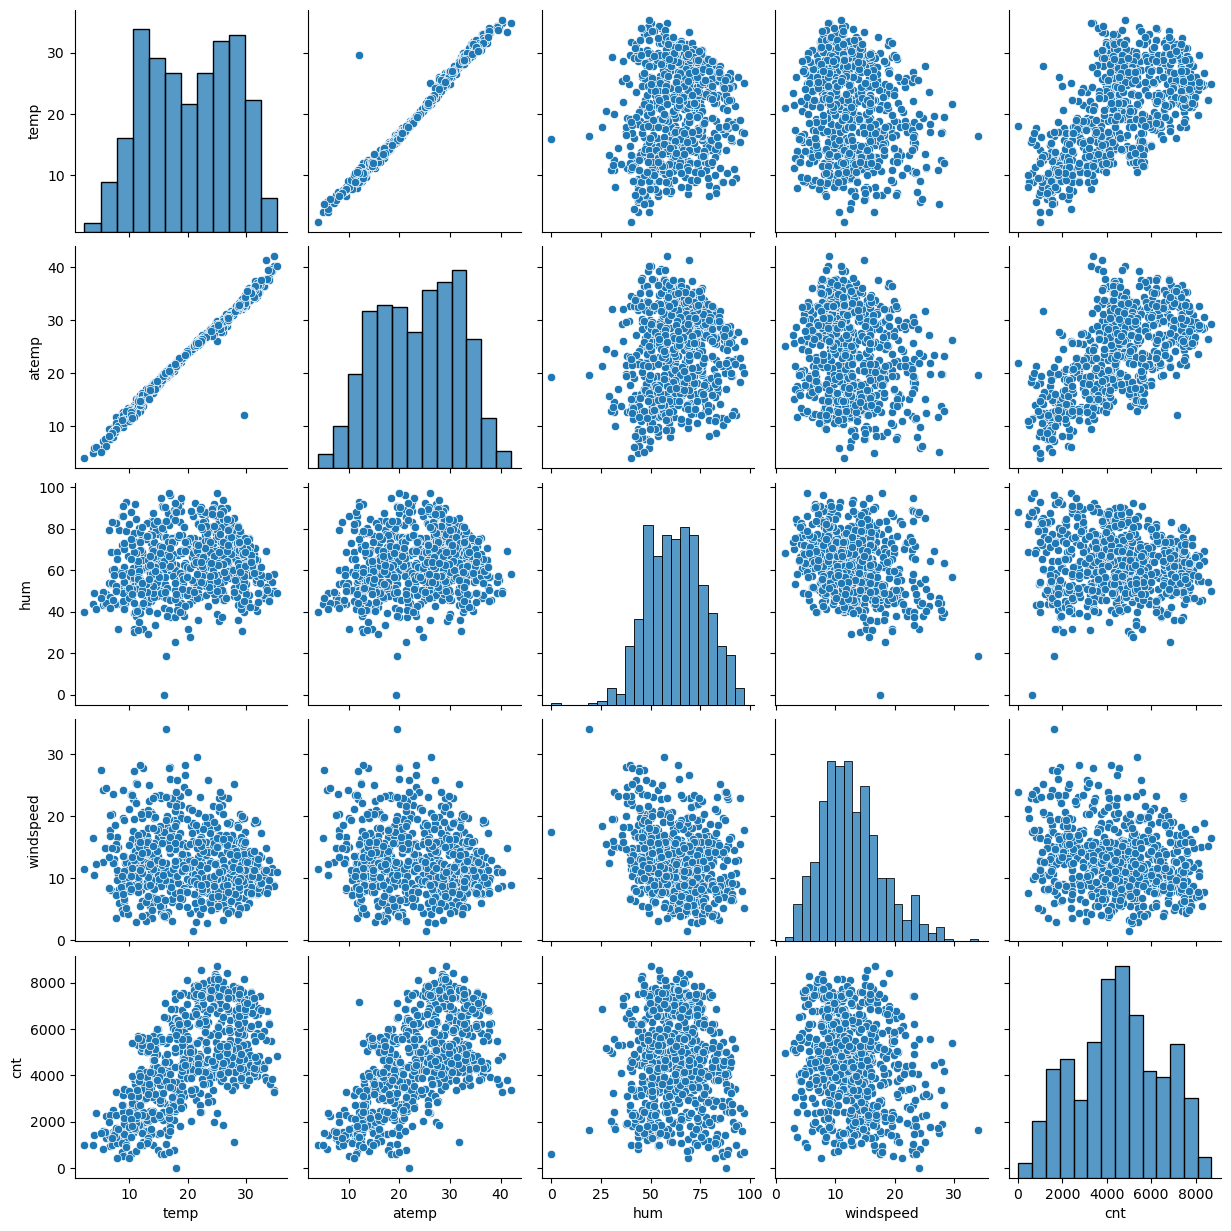

In [21]:
num_cols= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(sharing[num_cols])
plt.show()

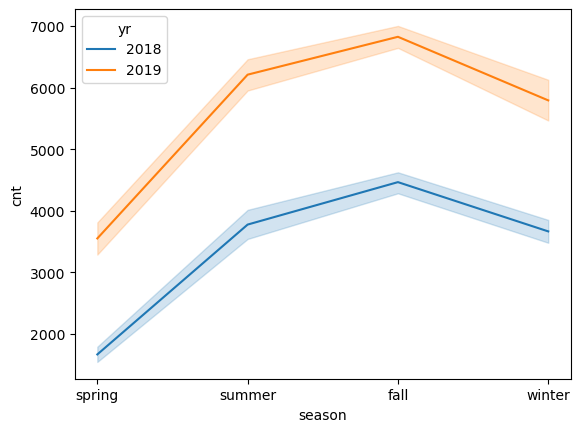

In [22]:
sns.lineplot(x = "season" , y = "cnt" , data = sharing,hue = "yr")
plt.show()

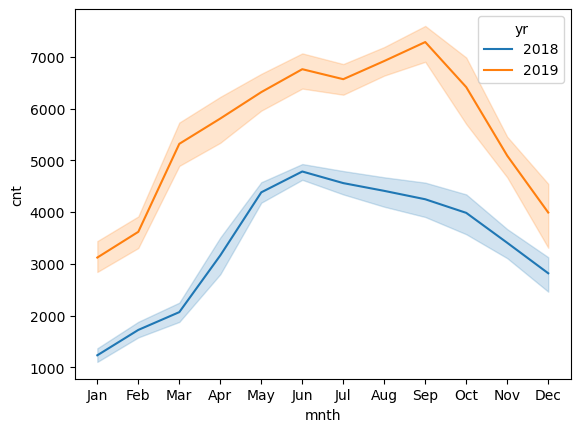

In [23]:
sns.lineplot(x = "mnth" , y = "cnt" , data = sharing,hue = "yr")
plt.show()

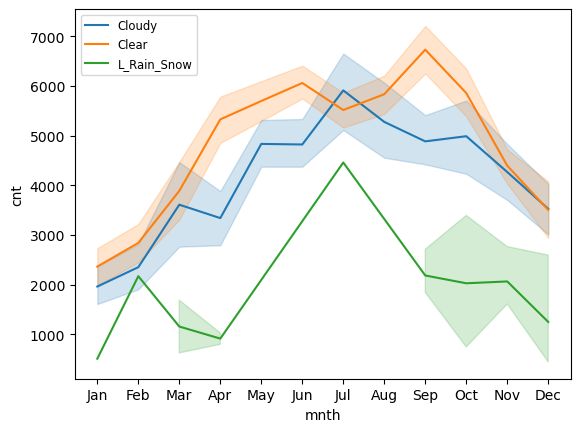

In [24]:
sns.lineplot(x = "mnth" , y = "cnt" , data = sharing,hue = "weathersit")
plt.legend(loc = "best", fontsize = "small")
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

# Uni-variate Analysis

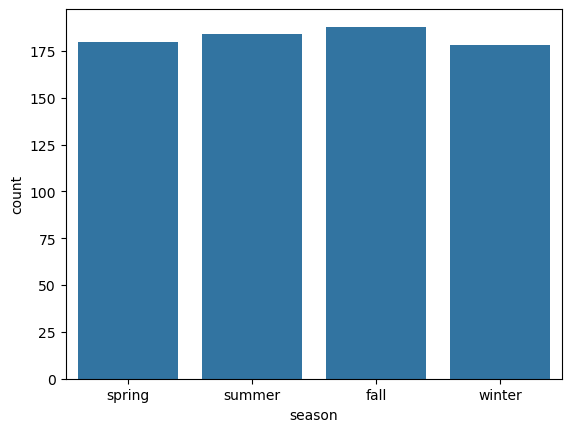

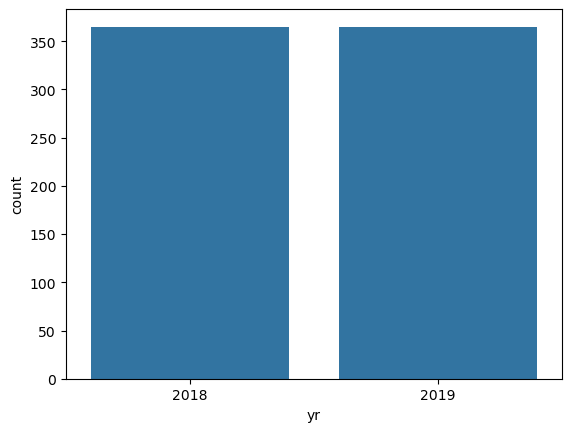

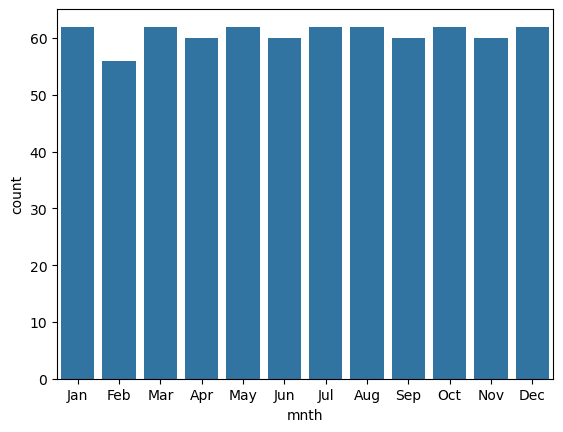

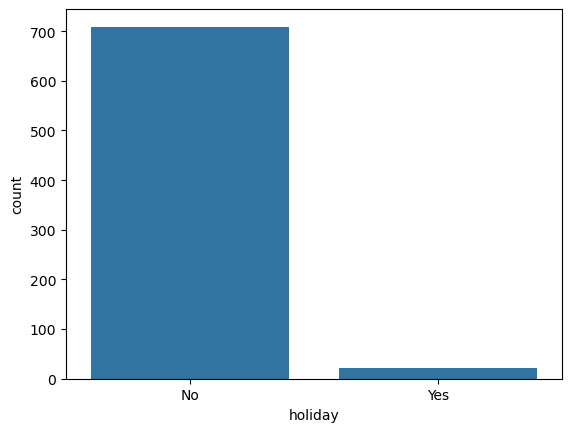

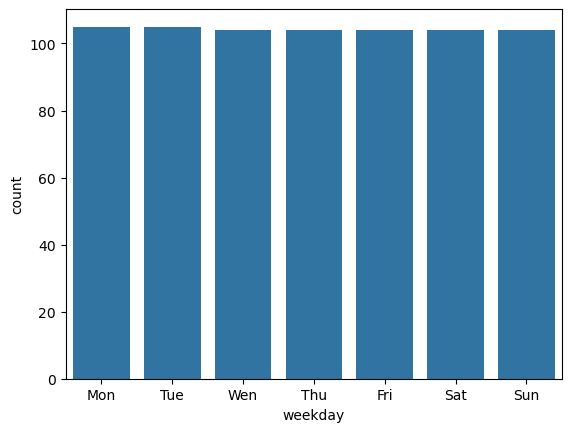

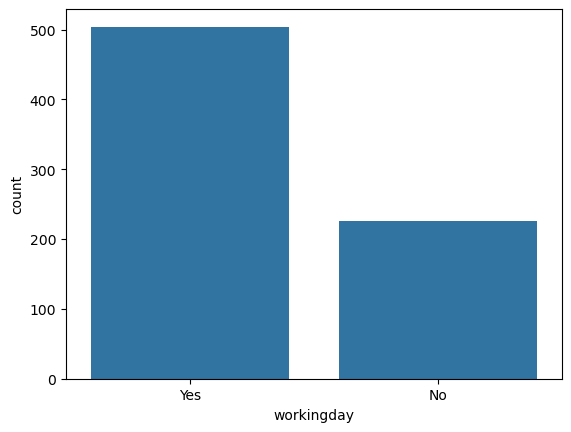

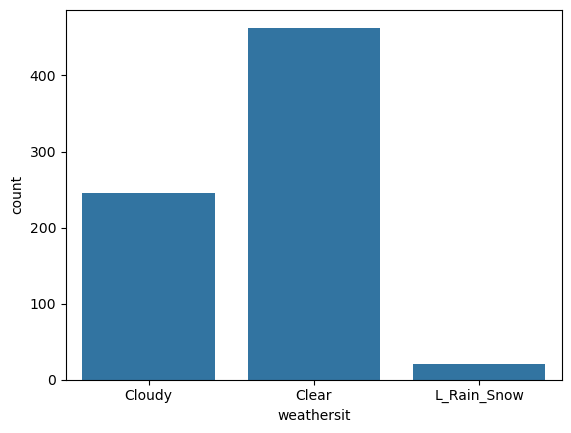

In [25]:
cat_cols = ["season", "yr" , "mnth", "holiday", "weekday","workingday","weathersit"]
for i in cat_cols:
    sns.countplot(x =sharing[i])
    plt.show()

# Bi-variate Analysis

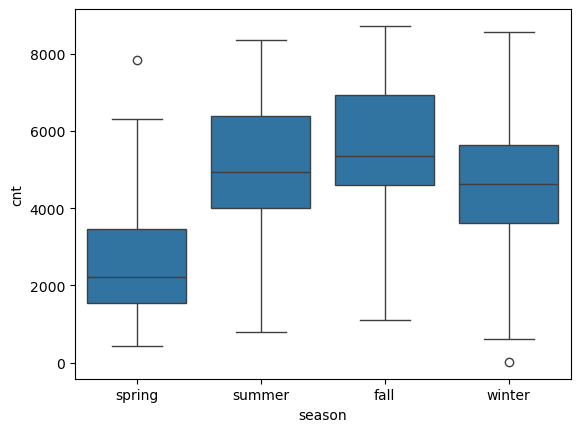

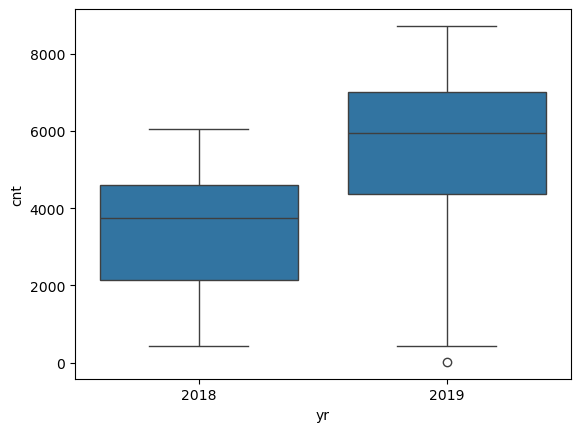

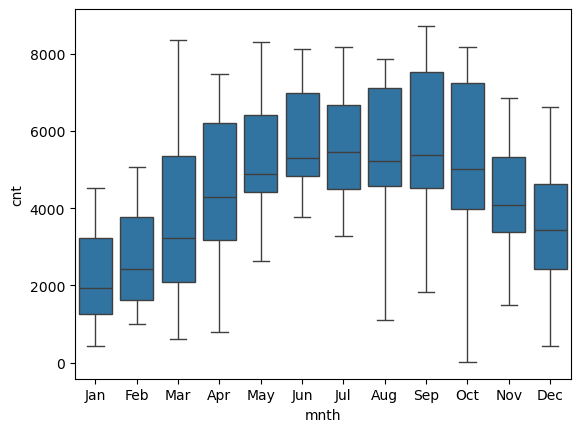

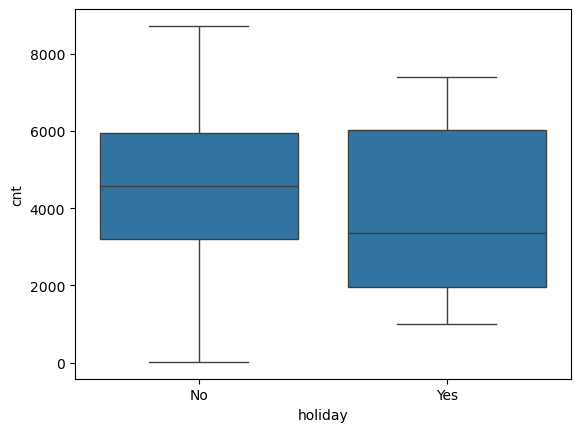

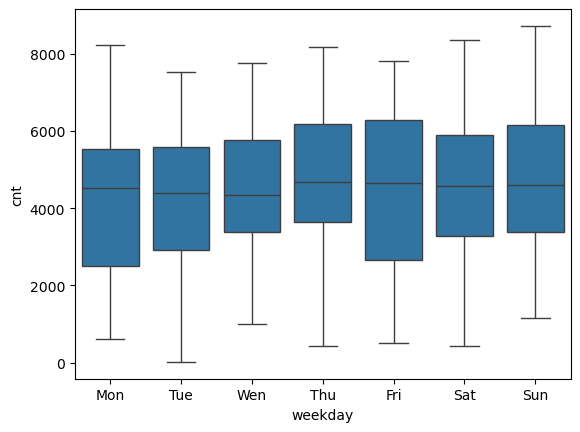

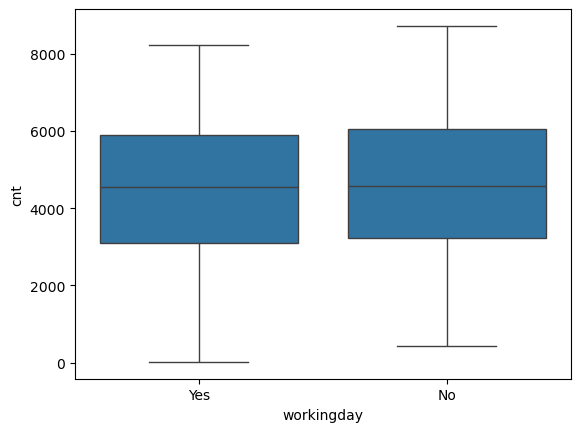

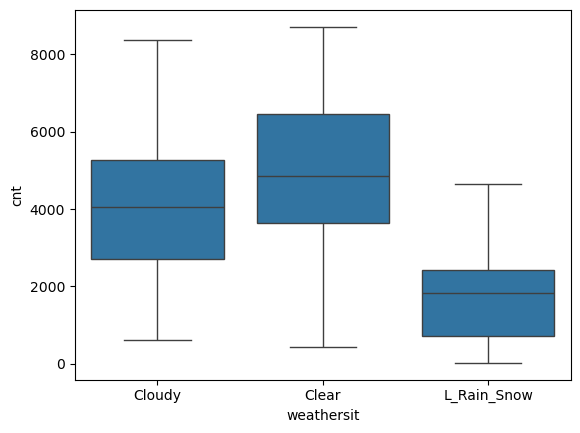

In [26]:
for i in cat_cols:
    sns.boxplot(x=sharing[i], y = sharing["cnt"])
    plt.show()

In [27]:
sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Pre-Processing of Data

In [28]:
# Creating Dummy variables for the categorical variables

In [29]:
sharing = pd.get_dummies(data = sharing, columns = ["season","weathersit","mnth","weekday"], drop_first=True)

In [30]:
sharing

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
0,1,2018-01-01,2018,No,Yes,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,2018,No,Yes,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,2018,No,Yes,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,2018,No,Yes,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,2018,No,Yes,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,2019,No,Yes,10.420847,11.33210,65.2917,23.458911,247,...,0,0,0,0,0,0,0,0,0,0
726,727,2019-12-28,2019,No,No,10.386653,12.75230,59.0000,10.416557,644,...,0,0,0,0,0,1,0,0,0,0
727,728,2019-12-29,2019,No,No,10.386653,12.12000,75.2917,8.333661,159,...,0,0,0,0,0,0,1,0,0,0
728,729,2019-12-30,2019,No,Yes,10.489153,11.58500,48.3333,23.500518,364,...,0,0,0,0,1,0,0,0,0,0


In [31]:
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   instant                 730 non-null    int64         
 1   dteday                  730 non-null    datetime64[ns]
 2   yr                      730 non-null    object        
 3   holiday                 730 non-null    object        
 4   workingday              730 non-null    object        
 5   temp                    730 non-null    float64       
 6   atemp                   730 non-null    float64       
 7   hum                     730 non-null    float64       
 8   windspeed               730 non-null    float64       
 9   casual                  730 non-null    int64         
 10  registered              730 non-null    int64         
 11  cnt                     730 non-null    int64         
 12  season_spring           730 non-null    uint8     

In [32]:
sharing[["holiday","workingday"]] = sharing[["holiday","workingday"]].apply(lambda x: x.map({"Yes":1,"No":0}))

In [33]:
def binary_mapping(x):
    if x == "2018":
        return(0)
    else:
        return(1)
sharing["yr"] = sharing["yr"].apply(binary_mapping)

In [34]:
sharing.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [35]:
sharing = sharing.drop(["registered","casual","dteday","instant"],axis = 1)

# "registered" and "casual" columns are derived from the target variable columns, so we can drop these two variables.
# "dteday" is date information but year,month, day information is already available.
# "instant" are just the instance so it also can be dropped.
# lets drop the "weathersit" as we have created dummies for it.

In [36]:
sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test = train_test_split(sharing, train_size = 0.7, test_size = 0.3, random_state =100)

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df_train.shape

(510, 30)

In [40]:
df_test.shape

(219, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
y_train = df_train.pop("cnt")
X_train = df_train

In [45]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [46]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# We will use the Hybrid approch (i.e Automated + Manual) for feature selection.

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [49]:
# Using RFE for initail top ten feature selection

In [50]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,n_features_to_select= 10)
rfe = rfe.fit(X_train,y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weathersit_Cloudy', False, 2),
 ('weathersit_L_Rain_Snow', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 19),
 ('mnth_Mar', False, 20),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 18),
 ('weekday_Tue', False, 13),
 ('weekday_Wen', False, 16)]

In [52]:
col = X_train.columns[rfe.support_] # Top 10 variable selected by RFE
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_L_Rain_Snow', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_] # Variables Discared by RFE

Index(['workingday', 'atemp', 'season_summer', 'weathersit_Cloudy', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wen'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_rfe)

# 1st Model

In [56]:
lm_1 = sm.OLS(y_train,X_train_1).fit()   # Running the 1st linear model

In [57]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.53e-184
Time:                        02:27:31   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [58]:
# "holiday", "hum","windspeed","season_spring","weathersit_L_Rain_Snow" & "mnth_Jul" is having Negetive coefficient.
# Where as all other variables is having positive coefficient.
# R-squared:      0.83
# Adj. R-squared: 0.826
# No varible is having high p value p>0.05
# So now we will look for multi-colinearity using VIF

In [59]:
X_train_1 = X_train_1.drop(['const'], axis=1)

In [60]:
# Calculate the VIFs for the 1st model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
8,mnth_Jul,1.40
9,mnth_Sep,1.20
7,weathersit_L_Rain_Snow,1.11
1,holiday,1.04


In [61]:
# We can see from the above table that "hum" is having VIF of 15.18.
# Any value more than 5 reflectes that the variable is having multi-colinearity and can be dropped. 

In [62]:
X_train_2 = X_train_1.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [63]:
X_train_lm = sm.add_constant(X_train_2)

In [64]:
X_train_lm

,const,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_L_Rain_Snow,mnth_Jul,mnth_Sep
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0


# 2nd Model

In [65]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model

In [66]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.33e-171
Time:                        02:27:32   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [67]:
# "holiday", "windspeed","season_spring","weathersit_L_Rain_Snow" & "mnth_Jul" is having Negetive coefficient.
# Where as all other variables is having positive coefficient.
# R-squared:      0.805 : Slight change in value
# Adj. R-squared: 0.801
# No varible is having high p value p>0.05
# So now we will look for multi-colinearity using VIF

In [68]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_L_Rain_Snow', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [69]:
X_train_2 = X_train_lm.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
7,mnth_Jul,1.34
8,mnth_Sep,1.20
6,weathersit_L_Rain_Snow,1.06
1,holiday,1.04


In [71]:
# We can see from the above table that no variable is having VIF >5
# we will stop the maunal featrue elimination procss here. and start residual analysis.

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_cnt = lm_2.predict(X_train_lm)

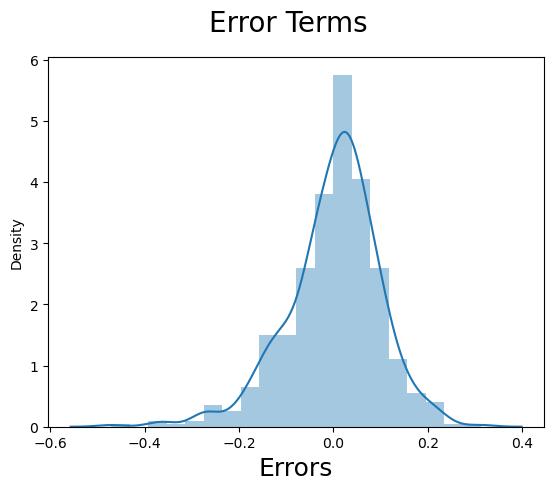

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [74]:
res = y_train - y_train_cnt

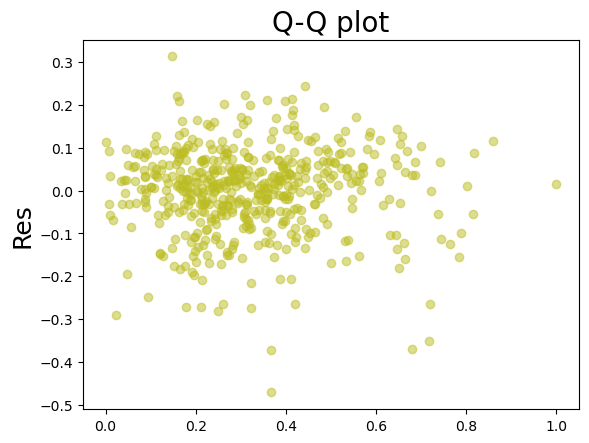

In [75]:
plt.scatter(X_train_2["windspeed"],res,c='#bcbd22', alpha=0.5,marker="o")
plt.title('Q-Q plot', fontsize = 20)                  # Plot heading 
plt.ylabel('Res', fontsize = 18)                         # X-label
plt.show()

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 2nd model.

#### Applying the scaling on the test sets¶

In [76]:
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X_test and y_test

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wen
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# Creating X_test_m2 dataframe by dropping variables from X_test

X_test_m2 = X_test[X_train_2.columns]

In [81]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test_m2)

In [82]:
X_test_m2.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_L_Rain_Snow,mnth_Jul,mnth_Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [83]:
# Making predictions using the fourth model

y_pred_m2 = lm_2.predict(X_test_m2)

In [84]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.33e-171
Time:                        02:27:34   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model Evaluation

In [85]:
from sklearn.metrics import r2_score
round(r2_score(y_true = y_test, y_pred =  y_pred_m2 ),3)

0.789

In [86]:
# The R2 score for the model was 0.805 and for the test data it came 0.789.  

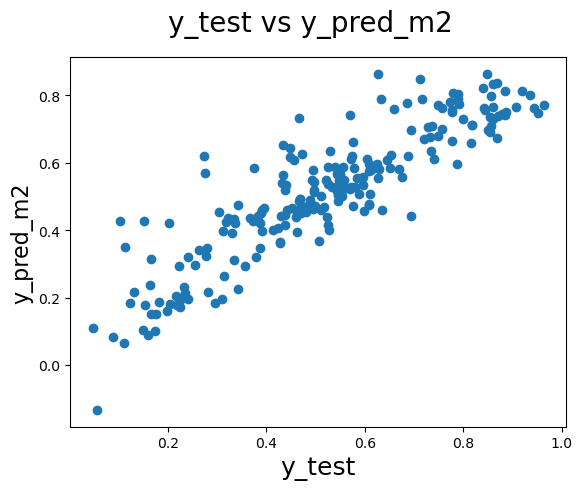

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m2)
fig.suptitle('y_test vs y_pred_m2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_m2', fontsize=16)                          # Y-label
plt.show()


### We can see that the equation of our best fitted line is:

##### cnt = 0.235 *  yr - 0.086 * holiday + 0.475 * temp - 0.132 * windspeed - 0.103 * season_spring + 0.05 * season_winter - 0.256 * weathersit_L_Rain_Snow - 0.061 * mnth_Jul + 0.049 * mnth_Sep